In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
minst = tf.keras.datasets.fashion_mnist

In [3]:
(X_train,y_train),(X_test,y_test)= minst.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

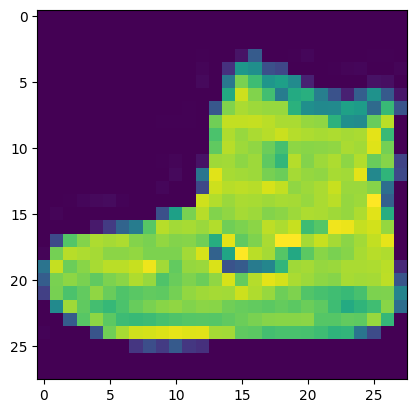

In [5]:
plt.imshow(X_train[0])

In [6]:
X_train= X_train/255.0
X_test = X_test/255.0

In [7]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape)

(60000, 28, 28, 1)


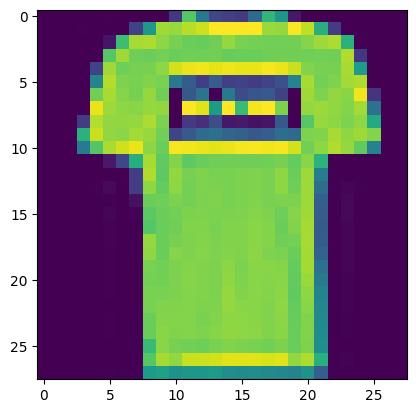

In [8]:
plt.imshow(X_train[1])

In [9]:
from tensorflow.keras import datasets, layers, models

In [10]:
print(len(set(y_train)))

10


In [11]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(128,(3,3),activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10,activation='softmax')
])

In [12]:
def scheduler(lr,epochs):
  if epochs>5:
    return 0.001
  return 0.006

schedule=tf.keras.callbacks.LearningRateScheduler(scheduler)

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [14]:
r = model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=8,batch_size=32)

Epoch 1/8
1875/1875 [==============================] - 96s 50ms/step - loss: 0.6700 - accuracy: 0.7577 - val_loss: 0.4659 - val_accuracy: 0.8275
Epoch 2/8
1875/1875 [==============================] - 85s 45ms/step - loss: 0.4526 - accuracy: 0.8360 - val_loss: 0.3962 - val_accuracy: 0.8559
Epoch 3/8
1875/1875 [==============================] - 83s 44ms/step - loss: 0.3929 - accuracy: 0.8579 - val_loss: 0.3596 - val_accuracy: 0.8660
Epoch 4/8
1875/1875 [==============================] - 91s 49ms/step - loss: 0.3572 - accuracy: 0.8705 - val_loss: 0.3383 - val_accuracy: 0.8770
Epoch 5/8
1875/1875 [==============================] - 81s 43ms/step - loss: 0.3344 - accuracy: 0.8788 - val_loss: 0.3314 - val_accuracy: 0.8774
Epoch 6/8
1875/1875 [==============================] - 82s 44ms/step - loss: 0.3145 - accuracy: 0.8838 - val_loss: 0.3221 - val_accuracy: 0.8791
Epoch 7/8
1875/1875 [==============================] - 86s 46ms/step - loss: 0.2976 - accuracy: 0.8897 - val_loss: 0.3058 - val_ac

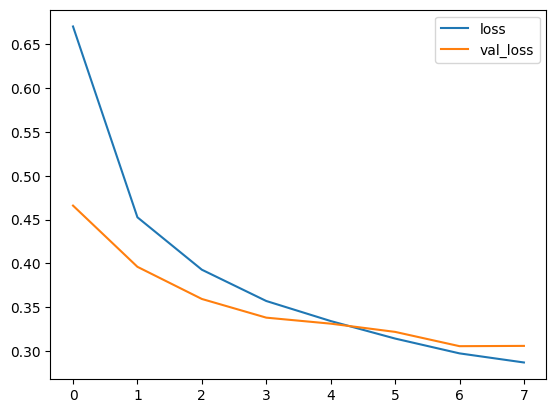

In [15]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()